In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')

In [8]:
#loading data for active neurons
D=np.loadtxt('ActiveNodeDensity.txt')

# time
t=D[:,0]

# excitatory
NE=D[:,1]

# inhibitory
NI=D[:,2]

Rho=NE+NI

(-0.1, 1.1)

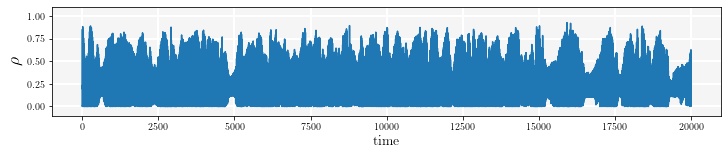

In [9]:
# Plotting fraction of active neurons (\rho) as a function of time
fig, ax=plt.subplots(figsize=(12,2), facecolor='white')
ax.set_facecolor('whitesmoke')
gs=GridSpec(8,15)

plt.plot(t,Rho, lw = 1.5)
plt.xlabel('time',fontsize=14, rotation=0)
plt.ylabel(r'$\rho$',fontsize=18, rotation=90)
plt.grid(color = 'white', linestyle = '-', linewidth = 2)
plt.ylim(-0.1,1.1)


(0.0, 0.2)

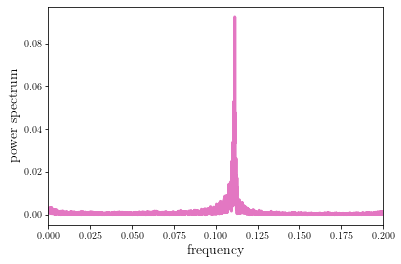

In [10]:
# Plotting the power spectrum of the network activity (\rho)
# Notice! Here for a correct result, set tmax more than 20000 in the C++ code

from numpy.fft import fft, ifft

L=len(t)
Fs = 1  #sampling frequency
Y=fft(Rho)    
P2 = np.abs(Y/L)
P1 = P2[0:int(L/2)+1]
end=len(P1)-1
P1[1:end] = 2*P1[1:end]
x=np.arange(0,(int(L/2)+1))
f = Fs*x/L
plt.plot(f[1:-2],P1[1:-2], color='C6', lw=3)
plt.xlabel('frequency',fontsize=14, rotation=0)
plt.ylabel('power spectrum',fontsize=14, rotation=90)
plt.xlim(0,0.2)